### 1. 데이터로더 만들기

In [1]:
# module
from konlpy.tag import Kkma, Hannanum, Komoran, Mecab, Twitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [2]:
t=Twitter()

c:\users\ryu07\anaconda3\envs\calculator\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [3]:
os.path.exists('./data/pk_data_total.csv')

True

In [4]:
# read csv file
data_path='./data/pk_data_300.csv'
data=pd.read_csv(data_path)

In [5]:
# 데이터 확인하기
data.head()

,Unnamed: 0,level_0,index,name,desc,type,egg_group
0,0.0,0.0,0.0,이상해씨,태어날 때부터 등에 식물의 씨앗이 있어 조금씩 크게 자란다.태어났을 때부터 등에 이...,"풀,독","괴수,식물"
1,1.0,1.0,1.0,이상해풀,꽃봉오리가 등에 붙어 있으며 양분을 흡수해가면 커다란 꽃이 핀다고 한다.등의 꽃봉오...,"풀,독","괴수,식물"
2,2.0,2.0,2.0,이상해꽃,꽃에서 황홀한 향기가 퍼져나가 싸우는 자의 기분을 달래게 한다.태양 에너지를 영양으...,"풀,독","괴수,식물"
3,3.0,3.0,3.0,파이리,태어날 때부터 꼬리의 불꽃이 타오르고 있다. 불꽃이 꺼지면 그 생명이 다하고 만다....,불꽃,"괴수,드래곤"
4,4.0,4.0,4.0,리자드,꼬리를 휘둘러 상대를 쓰러트리고 날카로운 발톱으로 갈기갈기 찢어버린다.불타는 꼬리를...,불꽃,"괴수,드래곤"


In [6]:
# data 정리
data.columns # Index(['Unnamed: 0', 'level_0', 'index', 'name', 'desc', 'type', 'egg_group'], dtype='object')



Index(['Unnamed: 0', 'level_0', 'index', 'name', 'desc', 'type', 'egg_group'], dtype='object')

In [9]:
data=data[['name', 'desc', 'type', 'egg_group']]

In [8]:
# 300번 이후의 row 삭제하기
data=data.iloc[:301]

In [7]:
# 첫 번째 문장의 개수 : 25개
len(data['desc'][0].split("."))

25

In [10]:
# 문장 갯수 세기
sentence_number=[]
for desc in data['desc']:
    
    sentence_number.append(len(desc.split(".")))

print(sentence_number)


[25, 25, 24, 31, 21, 23, 25, 33, 22, 36, 32, 32, 32, 26, 24, 26, 32, 23, 40, 37, 34, 35, 33, 30, 40, 36, 46, 41, 32, 30, 29, 28, 30, 27, 40, 36, 45, 41, 30, 41, 38, 42, 39, 25, 28, 34, 39, 29, 22, 34, 29, 40, 32, 38, 43, 32, 28, 33, 33, 37, 25, 28, 39, 30, 42, 42, 42, 36, 28, 25, 20, 43, 40, 47, 47, 41, 26, 26, 36, 24, 41, 33, 20, 31, 35, 37, 36, 46, 41, 34, 31, 36, 35, 32, 30, 31, 34, 26, 21, 33, 28, 29, 29, 31, 36, 27, 25, 36, 33, 31, 37, 36, 38, 30, 36, 30, 31, 30, 37, 32, 33, 34, 39, 28, 29, 40, 44, 30, 45, 33, 40, 31, 31, 35, 31, 29, 35, 33, 28, 34, 27, 34, 39, 27, 30, 29, 31, 31, 34, 23, 24, 24, 16, 16, 26, 27, 18, 23, 26, 15, 27, 20, 26, 24, 30, 25, 24, 27, 38, 31, 27, 41, 33, 35, 18, 20, 33, 24, 29, 28, 27, 29, 25, 29, 34, 24, 26, 18, 19, 27, 29, 23, 23, 23, 22, 27, 29, 28, 24, 27, 27, 28, 32, 33, 30, 26, 24, 21, 28, 31, 22, 25, 21, 31, 37, 23, 21, 26, 26, 27, 21, 33, 24, 30, 32, 28, 34, 21, 22, 31, 28, 27, 29, 13, 22, 22, 20, 27, 27, 29, 29, 27, 22, 21, 29, 30, 24, 23, 20, 18,

mean :  28.691029900332225
std :  6.954590677922378


(array([ 6., 17., 52., 45., 52., 58., 29., 22., 13.,  7.]),
 array([13. , 16.4, 19.8, 23.2, 26.6, 30. , 33.4, 36.8, 40.2, 43.6, 47. ]),
 <a list of 10 Patch objects>)

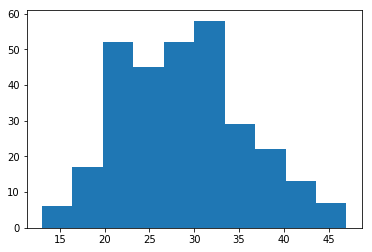

In [11]:
# 길이 분포보기
print("mean : ",np.mean(sentence_number))
print("std : ",np.std(sentence_number))
np.histogram(sentence_number)
plt.hist(sentence_number)

In [12]:
# sample로 시도해보기
sample=data['desc'][0]

In [13]:
# save
data.to_csv("text_data_181010.csv",index=False,header=False)

In [14]:
# JAVA_HOME 환경변수 다시 설정하기
twitter=Twitter()

In [16]:
# sample의 첫 문장을 형태소 별로 나누기
sample=twitter.pos(sample.split(".")[0])

In [17]:
sample[1][0]

'때'

In [18]:
# desc
total=[]
for pock in data['desc']: # pock : 하나의 포켓몬 단위
    pock_story=[]
  
    for sen in pock.split("."): # sen : 하나의 문장
        tmp=twitter.pos(sen)
        sentence=[]
        sentence.append("<start>")
        for i in tmp:
            sentence.append(i[0])
        sentence.append("<end>")
        pock_story.append(sentence)
        
    total.append(pock_story)

In [19]:
# 빈값 제외하기
tmp=[]
for pock in total:
    pock=pock[:-1]
    tmp.append(pock)
    
total=tmp
        
        

In [20]:
# vocabulary dictinary
word2index={}
for posc in total:
    for sen in posc:
        for pos in sen:
            if word2index.get(pos)==None: # dict.get(item)
                word2index[pos]=len(word2index)

print(word2index)

{'<start>': 0, '태어날': 1, '때': 2, '부터': 3, '등': 4, '에': 5, '식물': 6, '의': 7, '씨앗': 8, '이': 9, '있어': 10, '조금씩': 11, '크게': 12, '자란다': 13, '<end>': 14, '태어났을': 15, '이상한': 16, '심어져': 17, '있으며': 18, '몸': 19, '과': 20, '함께': 21, '자란다고': 22, '한다': 23, '며칠': 24, '동안': 25, '아무': 26, '것': 27, '도': 28, '먹지': 29, '않아도': 30, '건강': 31, '많은': 32, '영양': 33, '있기에': 34, '괜찮다': 35, '안': 36, '에는': 37, '듬뿍': 38, '은': 39, '같이': 40, '커지고': 41, '있다': 42, '을': 43, '짊어지': 44, '고': 45, '커지면': 46, '자란만큼': 47, '커지게': 48, '된다': 49, '태어나서': 50, '잠깐': 51, '모인': 52, '받고': 53, '양지': 54, '에서': 55, '낮잠': 56, '자는': 57, '모습': 58, '볼': 59, '수': 60, '태양': 61, '빛': 62, '많이': 63, '받으면': 64, '태어나면서': 65, '받으며': 66, '태어나서부터': 67, '얼마': 68, '으로부터': 69, '공급': 70, '받아': 71, '성장한다': 72, '가득하다': 73, '커진다': 74, '성장함에': 75, '따라': 76, '꽃봉오리': 77, '가': 78, '붙어': 79, '양분': 80, '흡수': 81, '해가면': 82, '커다란': 83, '꽃': 84, '핀다고': 85, '자라나면': 86, '두': 87, '발': 88, '로': 89, '설': 90, '없게': 91, '되는': 92, '듯': 93, '하다': 94, '커진': 95, '향기': 96, '나면': 97

In [21]:
len(word2index) # 7630

7632

In [22]:
#index2word 만들기

words=list(word2index.keys())

In [23]:
index2word={}

for i in range(len(word2index)):
    index2word[i]=words[i]
    

In [24]:
# save
def _save_pickle(path, data):
    # save pkl
    f = open(path, 'wb')
    pickle.dump(data, f)
    f.close()

_save_pickle("./data/index2word.pkl",index2word)
_save_pickle("./data/word2index.pkl",word2index)

In [25]:
# text data 를 index 형태로 바꾸기
def text2index(sentence):
    sen2idx=[]
    for pos in sentence:
        sen2idx.append(word2index[pos])
        
    return sen2idx
        




In [26]:
# text2idx 실행하기
posc2idx=[]
for posc in total:
    one_posc=[]
    for sen in posc:
        one_posc.append(text2index(sen))
    posc2idx.append(one_posc)
        
        


In [27]:
_save_pickle("./data/posc2idx.pkl",posc2idx)

In [29]:
word2index['<end>']

14

In [30]:
posc2idx


[[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
  [0, 15, 2, 3, 4, 5, 16, 8, 9, 17, 18, 19, 20, 21, 22, 23, 14],
  [0, 24, 25, 26, 27, 28, 29, 30, 31, 14],
  [0, 4, 7, 8, 5, 32, 33, 9, 34, 35, 14],
  [0, 4, 7, 8, 36, 37, 33, 9, 38, 14],
  [0, 8, 39, 19, 20, 40, 41, 42, 14],
  [0, 1, 2, 3, 4, 5, 8, 43, 44, 45, 42, 14],
  [0, 19, 9, 46, 47, 8, 28, 48, 49, 14],
  [0, 50, 51, 25, 4, 7, 8, 5, 52, 33, 43, 53, 13, 14],
  [0, 54, 55, 56, 57, 58, 43, 59, 60, 42, 14],
  [0, 61, 7, 62, 43, 63, 64, 4, 7, 8, 9, 12, 13, 14],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
  [0, 15, 2, 3, 4, 5, 16, 8, 9, 17, 18, 19, 20, 21, 22, 23, 14],
  [0, 65, 51, 25, 4, 7, 8, 55, 33, 43, 66, 12, 13, 14],
  [0, 67, 68, 25, 39, 4, 7, 8, 69, 33, 43, 70, 71, 12, 72, 14],
  [0, 4, 7, 8, 36, 37, 33, 9, 73, 14],
  [0, 8, 39, 19, 20, 21, 74, 14],
  [0, 1, 2, 3, 4, 5, 8, 43, 44, 45, 42, 14],
  [0, 19, 9, 12, 75, 76, 8, 28, 74, 14],
  [0, 67, 68, 25, 39, 4, 7, 8, 69, 33, 43, 70, 71, 12, 72, 14],
  [0, 15, 2, 3,